## 금융 데이터 수집 라이브러리를 이용한 하이닉스 주가 수집

In [2]:
#https://github.com/FinanceData/FinanceDataReader

import pandas as pd
import numpy as np
import FinanceDataReader

In [3]:
# !pip install finance-datareader

import FinanceDataReader as fdr

df_hinix = fdr.DataReader('000660', start='2000')

print(df_hinix)

# 단기로 하는게 성능이 좋음.

# 마지막 날은 아직 종가도 안나왔는데..01 19일자 벌써 종가가 나오다니 저걸 없애야함.

# 종가를 맞추는게 목적.

              Open    High     Low   Close    Volume    Change
Date                                                          
2000-01-04  484852  519204  475037  505462   9275920  0.068463
2000-01-05  474056  489759  446574  453444   7414370 -0.102912
2000-01-06  461296  467185  424981  429888   6529140 -0.051949
2000-01-07  416148  439704  408296  425962  10492270 -0.009133
2000-01-10  431852  437741  422037  422037   8041690 -0.009214
...            ...     ...     ...     ...       ...       ...
2024-01-18  131500  136800  130600  136200   3050556  0.039695
2024-01-19  138700  141300  137400  141300   4946040  0.037445
2024-01-22  145200  145400  142300  142600   3784276  0.009200
2024-01-23  142300  142800  138300  140800   2912611 -0.012623
2024-01-24  140000  140400  137600  138800   1410083 -0.014205

[5940 rows x 6 columns]


In [4]:
df_hinix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5940 entries, 2000-01-04 to 2024-01-24
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5940 non-null   int64  
 1   High    5940 non-null   int64  
 2   Low     5940 non-null   int64  
 3   Close   5940 non-null   int64  
 4   Volume  5940 non-null   int64  
 5   Change  5940 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 324.8 KB


In [5]:
### 마지막 행 제거

df_hinix = df_hinix.drop(index=['2024-01-24'])
print(df_hinix)

              Open    High     Low   Close    Volume    Change
Date                                                          
2000-01-04  484852  519204  475037  505462   9275920  0.068463
2000-01-05  474056  489759  446574  453444   7414370 -0.102912
2000-01-06  461296  467185  424981  429888   6529140 -0.051949
2000-01-07  416148  439704  408296  425962  10492270 -0.009133
2000-01-10  431852  437741  422037  422037   8041690 -0.009214
...            ...     ...     ...     ...       ...       ...
2024-01-17  133800  134500  129000  131000   3822702 -0.008327
2024-01-18  131500  136800  130600  136200   3050556  0.039695
2024-01-19  138700  141300  137400  141300   4946040  0.037445
2024-01-22  145200  145400  142300  142600   3784276  0.009200
2024-01-23  142300  142800  138300  140800   2912611 -0.012623

[5939 rows x 6 columns]


In [6]:
### 연도별 데이터 추출 기능 
stock1= df_hinix.loc['2023', :]

print(stock1)

              Open    High     Low   Close   Volume    Change
Date                                                         
2023-01-02   75100   76700   75000   75700  1376985  0.009333
2023-01-03   75600   76300   73100   75600  2719437 -0.001321
2023-01-04   75400   81900   75200   81000  5154609  0.071429
2023-01-05   83300   83300   80800   81400  3510964  0.004938
2023-01-06   81400   83600   81100   83100  3687430  0.020885
...            ...     ...     ...     ...      ...       ...
2023-12-21  139200  140600  138100  140500  2737124  0.000000
2023-12-22  142700  143700  140600  140600  3183709  0.000712
2023-12-26  142000  142000  139400  140900  2239789  0.002134
2023-12-27  140800  141600  139200  140400  2336777 -0.003549
2023-12-28  140900  141600  139500  141500  2459473  0.007835

[245 rows x 6 columns]


In [7]:
### 연도별 + 월별 데이터 추출 가능
stock2 = df_hinix.loc['2023-01':'2023-06', :]

print(stock2)

              Open    High     Low   Close   Volume    Change
Date                                                         
2023-01-02   75100   76700   75000   75700  1376985  0.009333
2023-01-03   75600   76300   73100   75600  2719437 -0.001321
2023-01-04   75400   81900   75200   81000  5154609  0.071429
2023-01-05   83300   83300   80800   81400  3510964  0.004938
2023-01-06   81400   83600   81100   83100  3687430  0.020885
...            ...     ...     ...     ...      ...       ...
2023-06-26  113100  113900  111200  113500  3350758 -0.000880
2023-06-27  114000  114000  110800  113000  3602087 -0.004405
2023-06-28  114200  115200  112800  114300  3178571  0.011504
2023-06-29  115200  117400  114500  116200  4398301  0.016623
2023-06-30  114600  115500  113200  115200  2674318 -0.008606

[123 rows x 6 columns]


In [13]:
### 데이터프레임으로부터 인덱스 추출
idx = df_hinix.index
print(idx)

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23'],
              dtype='datetime64[ns]', name='Date', length=5939, freq=None)


In [14]:
## 년도 정보 추출
year = idx.year
print(f'데이터프레임 인덱스의 연도정보 : \n{year}')

데이터프레임 인덱스의 연도정보 : 
Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='Date', length=5939)


In [10]:
## 월별 정보 추출
months = idx.month
print(f'데이터프레임 인덱스의 월별정보 : \n{months}')

데이터프레임 인덱스의 월별정보 : 
Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int32', name='Date', length=5939)


In [11]:
## 일별 정보 추출
days = idx.day
print(f'데이터프레임 인덱스의 일별정보 : \n{days}')

데이터프레임 인덱스의 일별정보 : 
Index([ 4,  5,  6,  7, 10, 11, 12, 13, 14, 17,
       ...
       10, 11, 12, 15, 16, 17, 18, 19, 22, 23],
      dtype='int32', name='Date', length=5939)


## 데이터 전처리 및 시각화

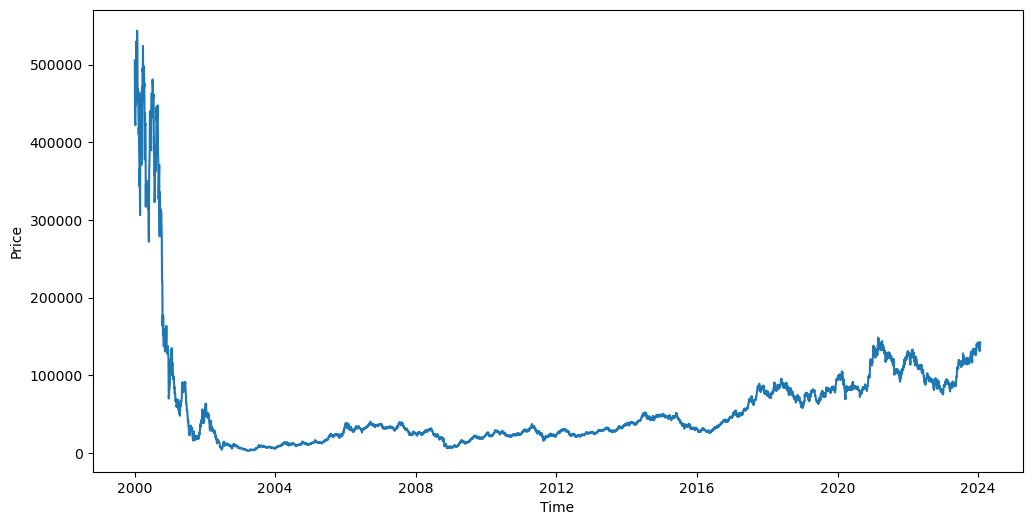

In [15]:
### seaborn lineplot을 이용, 전체 주가 시각화

# 시각화에 필요한 라이브러리 임폴트

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
plt.figure(figsize=(12,6))
sns.lineplot(data=df_hinix, x=df_hinix.index, y='Close')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [37]:
### X / y 데이터 생성
X = df_hinix.drop(columns=['Close', 'Change'])
y = df_hinix.loc[:,['Close']]

print(X)
print('*'*80)
print(y)

              Open    High     Low    Volume
Date                                        
2000-01-04  484852  519204  475037   9275920
2000-01-05  474056  489759  446574   7414370
2000-01-06  461296  467185  424981   6529140
2000-01-07  416148  439704  408296  10492270
2000-01-10  431852  437741  422037   8041690
...            ...     ...     ...       ...
2024-01-17  133800  134500  129000   3822702
2024-01-18  131500  136800  130600   3050556
2024-01-19  138700  141300  137400   4946040
2024-01-22  145200  145400  142300   3784276
2024-01-23  142300  142800  138300   2912611

[5939 rows x 4 columns]
********************************************************************************
             Close
Date              
2000-01-04  505462
2000-01-05  453444
2000-01-06  429888
2000-01-07  425962
2000-01-10  422037
...            ...
2024-01-17  131000
2024-01-18  136200
2024-01-19  141300
2024-01-22  142600
2024-01-23  140800

[5939 rows x 1 columns]


In [17]:
# min-max scaling으로 0과 1사이로 만들어주면 손실이 날 경우에

# 종가가 10,000원인데 예측이 9,000원이다. 차이가 1,000원.

# 우리는 손실을 mim squared error가 더 커져버린다. 백만단위..

# 평균제곱오차를 쓰기 때문에 min-max scaling을 쓴다.

# 0.1제곱은 0.01 오히려 오차라 더 작아진다. fit_transform을 쓸 것이다

In [38]:
from sklearn.preprocessing import MinMaxScaler


### Normalization(scaling) 진행 ( 누구다 나 0과 1사이로 재조정 강제로 맞추는 일종의 규제를 가하는 개념 )

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다.
# MinMaxScaler : (X - MIN) / ( MAX - MIN )
'''

#==Tfid Vectorizer 한글 영어 굳이 나눠놨다. 변수가 겹치지 않게 해주는 것보다 훨씬 더 중요하다
# 최소 최대가 다르기 때문에 MinMinScaler는 항상 따로 해줘야 한다.
# x와 y도 변형할 것.

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# scaling 실행
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# y가 1차원이니 2차원으로 변경해야함.


print(f'X_scaled의 모양 : \n{X_scaled.shape}')
print('*'*80)
print(f'X_scaled 확인 : \n{X_scaled}')

print(f'y_scaled의 모양 : \n{y_scaled.shape}')
print('*'*80)
print(f'y_scaled의 확인 : \n{y_scaled}')





X_scaled의 모양 : 
(5939, 4)
********************************************************************************
X_scaled 확인 : 
[[0.90097197 0.93101143 0.90253046 0.00506108]
 [0.88080015 0.87794121 0.84817234 0.00404539]
 [0.85695868 0.83725495 0.80693442 0.0035624 ]
 ...
 [0.25420309 0.24989591 0.25771743 0.00269863]
 [0.26634803 0.25728555 0.26707536 0.00206476]
 [0.26092952 0.25259944 0.25943623 0.00158916]]
y_scaled의 모양 : 
(5939, 1)
********************************************************************************
y_scaled의 확인 : 
[[0.92925761]
 [0.83312203]
 [0.78958768]
 ...
 [0.25624203]
 [0.25864459]
 [0.25531797]]


In [40]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

# 우리한테 단어는 특정 날짜의 데이터이다. 특정 날짜 몇개를 잡아서 데이터로 만들것인가..

def make_dataset(X, y, window_size=10):
    X_data_total = []
    y_data_total = []

    for start in np.arange(len(X) - window_size):
        
        # X는 데이터의 숫자 5936, - window_size=10, 5926
        # np.arange(5925,0,1) 스텝만큼 한값 덜 간 값 0부터 5925까지.
        #  0       9
        #   1         10
        #    2          11
        #    5925           5934
        # 뒤에 딱 한 개의 5935가 있는 것이다. 0부터 5935해야 5936개
        
        stop = start + window_size
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        # 슬라이싱 0 10 --> 0 - 9 
        y_data = y[stop]
        y_data_total.append(y_data)
        # 인덱싱 10을 넣으면 포함됨.
    return np.array(X_data_total), np.array(y_data_total)
    
        

In [41]:
### 시계열 분석에 적합한 데이터 생성 

# windows_size=10인 X, y 데이터 생성

X_data, y_data = make_dataset(X_scaled, y_scaled, window_size=10)

print(f'X_data의 모양 : \n{X_data.shape}')

print('*'*80)

print(f'y_data의 모양 : \n{y_data.shape}')

X_data의 모양 : 
(5929, 10, 4)
********************************************************************************
y_data의 모양 : 
(5929, 1)


In [42]:
### 시계열 분석에 적합한 데이터를 만들어주는 함수 정의

'''
1. window_size(time step, 시간 간격) 정의
   (1) 얼마 동안(기간)의 주가 데이터에 기반하여 다음날 종가를 예측할 것인가를 정하는 parameter
   (2) 과거 10일을 기반으로 내일 데이터를 예측한다라고 가정했을 때 window_size(시간 간격) = 10이 된다
   (3) 목표 : 과거 10일을 기준으로 그 다음날의 '종가'를 예측할 수 있는 데이터 생성
2.. 순차적으로 10일 동안의 데이터를 하나의 데이터로 묶고,
3. 이에 맞는 label(예측 데이터) 생성
'''

def make_dataset(X, y, window_size=10):
    X_data_total = []
    y_data_total = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data = X[start:stop, :]
        X_data_total.append(X_data)
        y_data = y[stop]
        y_data_total.append(y_data)
    return np.array(X_data_total), np.array(y_data_total)

#5교육실 휴먼 2:53 PM


In [43]:
### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의

def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size+1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [45]:
### 학습용 / 검증용 / 평가용 데이터 생성

'''
# TEST_SIZE 설정
   (1) TEST_SIZE = 200으로 설정
   (2) TEST_SIZE = 200은 가장 최근 200일의 데이터로 모델이 주가를 예측
   (3) 학습은 과거부터 200일 이전의 데이터를 학습
'''

## 학습용 / 평가용 데이터로 분할

# 평가용 데이터의 크기 설정
TEST_SIZE = 200

# 학습용 데이터 생성
X_train = X_data[:-200, :, :] #리버스인덱스, 끝번호에서 계산하면 어려울게없다! 
y_train = y_data[:-TEST_SIZE:]


# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:]



## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=0)
# stratify=y_train 분류할때만...
                 
# 결과 확인하기
print(f'학습용 X 데이터의 모양 : {X_train.shape}')
print('*'*80)
print(f'학습용 y 데이터의 모양 : {y_train.shape}')
print('*'*80)

print(f'검증용 X 데이터의 모양 : {X_val.shape}')
print('*'*80)
print(f'검증용 y 데이터의 모양 : {y_val.shape}')

print(f'평가용 X 데이터의 모양 : {X_test.shape}')
print('*'*80)
print(f'평가용 y 데이터의 모양 : {y_test.shape}')

학습용 X 데이터의 모양 : (4583, 10, 4)
********************************************************************************
학습용 y 데이터의 모양 : (4583, 1)
********************************************************************************
검증용 X 데이터의 모양 : (1146, 10, 4)
********************************************************************************
검증용 y 데이터의 모양 : (1146, 1)
평가용 X 데이터의 모양 : (200, 10, 4)
********************************************************************************
평가용 y 데이터의 모양 : (200, 1)


In [25]:
### 시계열 분석에서 마지막 텍스트 데이터 생성
X_last_test = make_last_dataset(X_scaled, 10)
print(X_last_test)

[[0.25233463 0.24412839 0.24759558 0.00205656]
 [0.24243183 0.24232604 0.24816852 0.00196144]
 [0.24990564 0.24268651 0.2500783  0.00102516]
 [0.24691612 0.23872134 0.24988732 0.00101423]
 [0.24280552 0.23619805 0.2456858  0.0020025 ]
 [0.24504766 0.23763993 0.24167526 0.00208572]
 [0.24075022 0.24178534 0.24473091 0.00166443]
 [0.25420309 0.24989591 0.25771743 0.00269863]
 [0.26634803 0.25728555 0.26707536 0.00206476]
 [0.26092952 0.25259944 0.25943623 0.00158916]]


## 주가 예측 모델

In [26]:
'''
모델 정의, feature 데이터의 복잡도가 그렇게 크지 않고 학습해야할 데이터도 10,000개 이하 수준이기 때문에
아주 단순한 모델로도 충분히 좋은 성능을 기대해 볼 수 있습니다. 오히려 너무 복잡한 모델이 과적합을
유발하고, 학습도 잘 되지 못하는 결과를 낳을 수 있다.
'''


# 필요한 라이브러리 임폴트
import tensorflow as tf
import random


# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)


# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               activation='tanh',
                               return_sequences=True, # return_sequences를 넣어야 두번 넣었을 때 의미가 생긴다!
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32,
                               activation='tanh',
                               kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(units=1,
                                kernel_initializer=initializer))


# (첫 행은 10,4열로 들어갔으나 batch_size를 통해 결국 나중에 3차원으로 진행)

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])


# 모델 확인
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30113 (117.63 KB)
Trainable params: 30113 (117.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
### 모델 학습


# 필요한 라이브러리 임폴트
import tensorflow as tf


# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=5)


# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model_fdr.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)


# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=120,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, checkpoint]
                   )


Epoch 1/120


16/18 [=========================>....] - ETA: 0s - loss: 0.0368 - mse: 0.0368
Epoch 1: val_loss improved from inf to 0.02933, saving model to stock_model_fdr.h5
18/18 [==============================] - 6s 81ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0293 - val_mse: 0.0293
Epoch 2/120
 4/18 [=====>........................] - ETA: 0s - loss: 0.0280 - mse: 0.0280

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


17/18 [===========================>..] - ETA: 0s - loss: 0.0229 - mse: 0.0229
Epoch 2: val_loss improved from 0.02933 to 0.01857, saving model to stock_model_fdr.h5
18/18 [==============================] - 0s 26ms/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0186 - val_mse: 0.0186
Epoch 3/120
18/18 [==============================] - ETA: 0s - loss: 0.0137 - mse: 0.0137
Epoch 3: val_loss improved from 0.01857 to 0.01131, saving model to stock_model_fdr.h5
18/18 [==============================] - 0s 27ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 4/120
18/18 [==============================] - ETA: 0s - loss: 0.0082 - mse: 0.0082
Epoch 4: val_loss improved from 0.01131 to 0.00672, saving model to stock_model_fdr.h5
18/18 [==============================] - 1s 30ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 5/120
16/18 [=========================>....] - ETA: 0s - loss: 0.0050 - mse: 0.0050
Epoch 5: val_loss improved from

### 평가용 데이터를 이용한 예측

In [30]:
pred= model.predict(X_test)
print(f'최근 200일 동안 하이닉스의 주가에 대한 예측 : \n{pred}')

7/7 [==============================] - 1s 4ms/step
최근 200일 동안 하이닉스의 주가에 대한 예측 : 
[[0.1502847 ]
 [0.15159668]
 [0.15258305]
 [0.15333277]
 [0.1536199 ]
 [0.15349604]
 [0.1529044 ]
 [0.15286492]
 [0.1531874 ]
 [0.15353118]
 [0.15365742]
 [0.15401934]
 [0.15441176]
 [0.1554196 ]
 [0.15632848]
 [0.15716171]
 [0.1571352 ]
 [0.1566955 ]
 [0.1559004 ]
 [0.15503527]
 [0.15455925]
 [0.15421526]
 [0.15427145]
 [0.15442078]
 [0.1547757 ]
 [0.15528025]
 [0.15550505]
 [0.15564586]
 [0.15590341]
 [0.1559024 ]
 [0.1556574 ]
 [0.1550261 ]
 [0.15467483]
 [0.15485103]
 [0.15557615]
 [0.15673561]
 [0.1585712 ]
 [0.1608076 ]
 [0.1636114 ]
 [0.16694042]
 [0.17098632]
 [0.17491423]
 [0.17856409]
 [0.18218094]
 [0.18532696]
 [0.18798211]
 [0.19032161]
 [0.19274358]
 [0.19426884]
 [0.19536582]
 [0.19619113]
 [0.19789697]
 [0.20024273]
 [0.20188968]
 [0.20359118]
 [0.20536552]
 [0.20704783]
 [0.2077935 ]
 [0.20755802]
 [0.20656604]
 [0.20538472]
 [0.20417896]
 [0.20345719]
 [0.20308958]
 [0.20340101]
 [0.20361

In [31]:
### 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성

df_test = pd.DataFrame(data=y_test, columns=['y_test']) 

df_test['predict'] = pred
date = df_hinix.index[-200:] # 최근 200일만 취하겠다
df_test.index = date

# 결과 확인하기

print(df_test)

              y_test   predict
Date                          
2023-03-31  0.158846  0.150285
2023-04-03  0.156259  0.151597
2023-04-04  0.151269  0.152583
2023-04-05  0.151454  0.153333
2023-04-06  0.149975  0.153620
...              ...       ...
2024-01-17  0.237206  0.244212
2024-01-18  0.246817  0.242979
2024-01-19  0.256242  0.242031
2024-01-22  0.258645  0.241591
2024-01-23  0.255318  0.241722

[200 rows x 2 columns]


In [32]:
df_hinix

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,484852,519204,475037,505462,9275920,0.068463
2000-01-05,474056,489759,446574,453444,7414370,-0.102912
2000-01-06,461296,467185,424981,429888,6529140,-0.051949
2000-01-07,416148,439704,408296,425962,10492270,-0.009133
2000-01-10,431852,437741,422037,422037,8041690,-0.009214
...,...,...,...,...,...,...
2024-01-17,133800,134500,129000,131000,3822702,-0.008327
2024-01-18,131500,136800,130600,136200,3050556,0.039695
2024-01-19,138700,141300,137400,141300,4946040,0.037445


In [34]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
pred_inverse = scaler_y.inverse_transform(pred)
print(f'원래 규모의 가격으로 변환시킨 하이닉스의 주가 예측 : \n{pred_inverse}')
df_test['test_origin'] = df_hinix.loc['2023-03-28':,'Close']
print(df_test)
print('*'*80)
df_test['pred_origin'] = pred_inverse
print(df_test)
print('*'*80)
error = df_test.loc[:,'test_origin'] - df_test.loc[:,'pred_origin']
df_test['error']=error

# 결과 확인하기

df_test

원래 규모의 가격으로 변환시킨 하이닉스의 주가 예측 : 
[[ 83967.55 ]
 [ 84677.445]
 [ 85211.164]
 [ 85616.83 ]
 [ 85772.19 ]
 [ 85705.17 ]
 [ 85385.05 ]
 [ 85363.68 ]
 [ 85538.164]
 [ 85724.19 ]
 [ 85792.49 ]
 [ 85988.33 ]
 [ 86200.66 ]
 [ 86745.99 ]
 [ 87237.78 ]
 [ 87688.63 ]
 [ 87674.29 ]
 [ 87436.37 ]
 [ 87006.15 ]
 [ 86538.03 ]
 [ 86280.47 ]
 [ 86094.336]
 [ 86124.74 ]
 [ 86205.54 ]
 [ 86397.58 ]
 [ 86670.586]
 [ 86792.23 ]
 [ 86868.42 ]
 [ 87007.77 ]
 [ 87007.23 ]
 [ 86874.66 ]
 [ 86533.07 ]
 [ 86343.   ]
 [ 86438.34 ]
 [ 86830.7  ]
 [ 87458.07 ]
 [ 88451.29 ]
 [ 89661.38 ]
 [ 91178.49 ]
 [ 92979.79 ]
 [ 95168.99 ]
 [ 97294.336]
 [ 99269.24 ]
 [101226.28 ]
 [102928.56 ]
 [104365.24 ]
 [105631.12 ]
 [106941.625]
 [107766.92 ]
 [108360.49 ]
 [108807.06 ]
 [109730.07 ]
 [110999.336]
 [111890.484]
 [112811.15 ]
 [113771.23 ]
 [114681.516]
 [115084.984]
 [114957.57 ]
 [114420.81 ]
 [113781.62 ]
 [113129.195]
 [112738.65 ]
 [112539.74 ]
 [112708.25 ]
 [112822.18 ]
 [113087.67 ]
 [113294.56 ]
 [113446.1  ]
 [

,y_test,predict,test_origin,pred_origin,error
Date,,,,,
2023-03-31,0.158846,0.150285,88600,83967.546875,4632.453125
2023-04-03,0.156259,0.151597,87200,84677.445312,2522.554688
2023-04-04,0.151269,0.152583,84500,85211.164062,-711.164062
2023-04-05,0.151454,0.153333,84600,85616.828125,-1016.828125
2023-04-06,0.149975,0.153620,83800,85772.187500,-1972.187500
...,...,...,...,...,...
2024-01-17,0.237206,0.244212,131000,134790.718750,-3790.718750
2024-01-18,0.246817,0.242979,136200,134123.265625,2076.734375
2024-01-19,0.256242,0.242031,141300,133610.375000,7689.625000


## 예측 결과 시각화

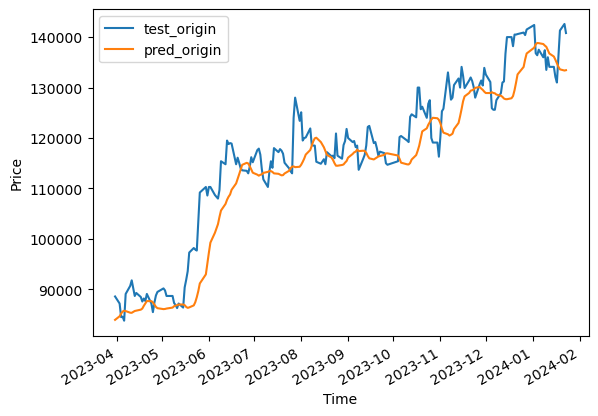

In [35]:
## 결과 시각화
df_test.loc[:, ['test_origin', 'pred_origin']].plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## 다음날 주가 예측


In [36]:
### 1월 19일 종가 예측하기 --> 마지막 평가용 데이터 이용

# 마지막 평가용 데이터의 모양 확인
print(X_last_test) # 2차원이므로 3차원으로 변환해줘야함.

# 모양 변환 : 2차원 --> 3차원
X_last_test = X_last_test.reshape((1, 10, 4))

# 모델에 의한 예측 실행
pred_last = model.predict(X_last_test)
print(pred_last)
# inverse_transform 써서 다시 변환해줘야함.


# 스케일링 이전의 상태로 복원
stock_price = scaler_y.inverse_transform(pred_last)
print(f'1월 19일 하이닉스의 주가는 = {stock_price}')

[[0.25233463 0.24412839 0.24759558 0.00205656]
 [0.24243183 0.24232604 0.24816852 0.00196144]
 [0.24990564 0.24268651 0.2500783  0.00102516]
 [0.24691612 0.23872134 0.24988732 0.00101423]
 [0.24280552 0.23619805 0.2456858  0.0020025 ]
 [0.24504766 0.23763993 0.24167526 0.00208572]
 [0.24075022 0.24178534 0.24473091 0.00166443]
 [0.25420309 0.24989591 0.25771743 0.00269863]
 [0.26634803 0.25728555 0.26707536 0.00206476]
 [0.26092952 0.25259944 0.25943623 0.00158916]]
1/1 [==============================] - 0s 60ms/step
[[0.24197955]]
1월 19일 하이닉스의 주가는 = [[133582.72]]
